<a href="https://cognitiveclass.ai"><img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/IDSNlogo.png" width = 400> </a>

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in New York City</font></h1>


## Introduction

In this project, we are going to study the neighborhoods in Toronto City, the get an idea of the available venues in each one, and try to make some cluster of neighborhoods according to theses available venues. This will be done using

* `BeautifulSoup` to get the list of the Neighborhoods
* `pgeocode` to get the longitude and latitude values of each neighborhoods
* `foursquare` to get the venues available in each neighborhoods
* `scikit-learn` to train a clustering method
* `folium` to be able to view our results on the map of Toronto


Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium==0.5.0 # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 79 kB 1.8 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=80814 sha256=11caaca54bfbcb8620af2cab90b739dd45d79c5967798c2fdc4ee3927e23773e
  Stored in directory: /home/anhendri/.cache/pip/wheels/47/55/33/a3b63f41145bccae6df611797dd948e5e0d8bc249b5ca14906
S

<a id='item1'></a>


## Acquiring Toronto data

Using `BeautifulSoup`, we are going to analyze the content of <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M">this page</a> to list the postal codes of Toronto, with the corresponding boroughs and neighborhood and then save it into a `pandas` dataframe. Due to the format of this web page, some adjustment have to be done, like replacing **'East TorontoBusiness reply mail Processing Centre969 Eastern'** by **'East Toronto Business'**

In [32]:
!pip install BeautifulSoup4
from bs4 import BeautifulSoup
import urllib.request

urlpage = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = urllib.request.urlopen(urlpage)
soup = BeautifulSoup(page, 'html.parser')

column_names  = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

table = soup.find('table')
for row in table.findAll('td'):
    if row.span.text != 'Not assigned':
        neighborhoods = neighborhoods.append({
            'PostalCode' : row.p.text[:3],
            'Borough': (row.span.text).split('(')[0],
            'Neighborhood': (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        },
        ignore_index = True)

# print(table_contents)
neighborhoods['Borough']=neighborhoods['Borough'].replace({
    'Downtown TorontoStn A PO Boxes25 The Esplanade' : 'Downtown Toronto Stn A',
    'East TorontoBusiness reply mail Processing Centre969 Eastern' : 'East Toronto Business',
    'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto' : 'East York/East Toronto',
    'MississaugaCanada Post Gateway Processing Centre' : 'Mississauga'}
)

neighborhoods

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable


,Borough,Neighborhood,Latitude,Longitude,PostalCode
0,North York,Parkwoods,NaN,NaN,M3A
1,North York,Victoria Village,NaN,NaN,M4A
2,Downtown Toronto,"Regent Park, Harbourfront",NaN,NaN,M5A
3,North York,"Lawrence Manor, Lawrence Heights",NaN,NaN,M6A
4,Queen's Park,Ontario Provincial Government,NaN,NaN,M7A
5,Etobicoke,Islington Avenue,NaN,NaN,M9A
6,Scarborough,"Malvern, Rouge",NaN,NaN,M1B
7,North York,Don Mills North,NaN,NaN,M3B
8,East York,"Parkview Hill, Woodbine Gardens",NaN,NaN,M4B
9,Downtown Toronto,"Garden District, Ryerson",NaN,NaN,M5B


#### Add coordinates to dataframe


As we can see in the previous output, the Latitude and Longitude values are empty (set to NaN). So the next task will be to complete our dataframe by adding the latitude and longitude values of each neighborhoods. For that, we will use the `pgeocode` package, which has the advantage to be more stable than some others solutions proposed in this course.


In [86]:
#!pip install pgeocode
import pgeocode
pgeocode.Nominatim('ca')
geolocator = pgeocode.Nominatim('ca')
for (idx,neighborhood) in neighborhoods.iterrows() :
    while True :
        g = geolocator.query_postal_code(neighborhoods.loc[idx, "PostalCode"])
        if not g.empty:
            neighborhoods.loc[idx,"Latitude"] = g.latitude
            neighborhoods.loc[idx,"Longitude"] = g.longitude
            break
neighborhoods.dropna(subset = ["Latitude", "Longitude"], inplace=True)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude,PostalCode
0,North York,Parkwoods,43.7545,-79.3300,M3A
1,North York,Victoria Village,43.7276,-79.3148,M4A
2,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,M5A
3,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504,M6A
4,Queen's Park,Ontario Provincial Government,43.6641,-79.3889,M7A
5,Etobicoke,Islington Avenue,43.6662,-79.5282,M9A
6,Scarborough,"Malvern, Rouge",43.8113,-79.1930,M1B
7,North York,Don Mills North,43.7450,-79.3590,M3B
8,East York,"Parkview Hill, Woodbine Gardens",43.7063,-79.3094,M4B
9,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3783,M5B


#### Create a map of Toronto with neighborhoods superimposed on top.

Now that we have the coordinate of each neighborhoods, we're able to display them on the map of Toronto. First, we need to use geoCode to get the latitude and longitude values of Toronto, to be able to view the Toronto Map, using the `folium` package

In [197]:
# create map of New York using latitude and longitude values
address    = 'Toronto'
geolocator = Nominatim(user_agent="ny_explorer")
location   = geolocator.geocode(address)
latitude   = location.latitude
longitude  = location.longitude
map        = folium.Map(location=[latitude, longitude], zoom_start=10)
map

Now we can use our previously computed coordinates for the neighborhood in order to add them on the map :

In [198]:
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius       = 5,
        popup        = label,
        color        = 'blue',
        fill         = True,
        fill_color   = '#3186cc',
        fill_opacity = 0.7,
        parse_html   = False
    ).add_to(map)  
    
map

## Acquiring venues of each neighborhood

#### Define Foursquare Credentials and Version

Now we are going to use Foursquare API to the the list of the venues. First, we have to set our credential, to be able to use the API.

In [199]:
CLIENT_ID = ... # your Foursquare ID
CLIENT_SECRET = ... # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

Then we can create a function to list venues for a particular list of neighborhoods, just like we did for NYC. Using the foursquare API, the function can be written as :

In [98]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Finaly, We can now execute this request to get the differents venues for all the neighborhoods of Toronto


In [ ]:
pd_venues = getNearbyVenues(
    names      = neighborhoods['Neighborhood'],
    latitudes  = neighborhoods['Latitude'],
    longitudes = neighborhoods['Longitude']
)

## 3. Analyze Each Neighborhood

Now it can be interesting to get some statistics about the venues, to know the frequency of some venues in a particular neighbourhood for example. This can be done by switch our data representation using one-hot encoding.

In [ ]:
# one hot encoding
toronto_onehot = pd.get_dummies(pd_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = pd_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category. We can then show on a heatmap these frequency to get some ideas of the most and least common venues. 

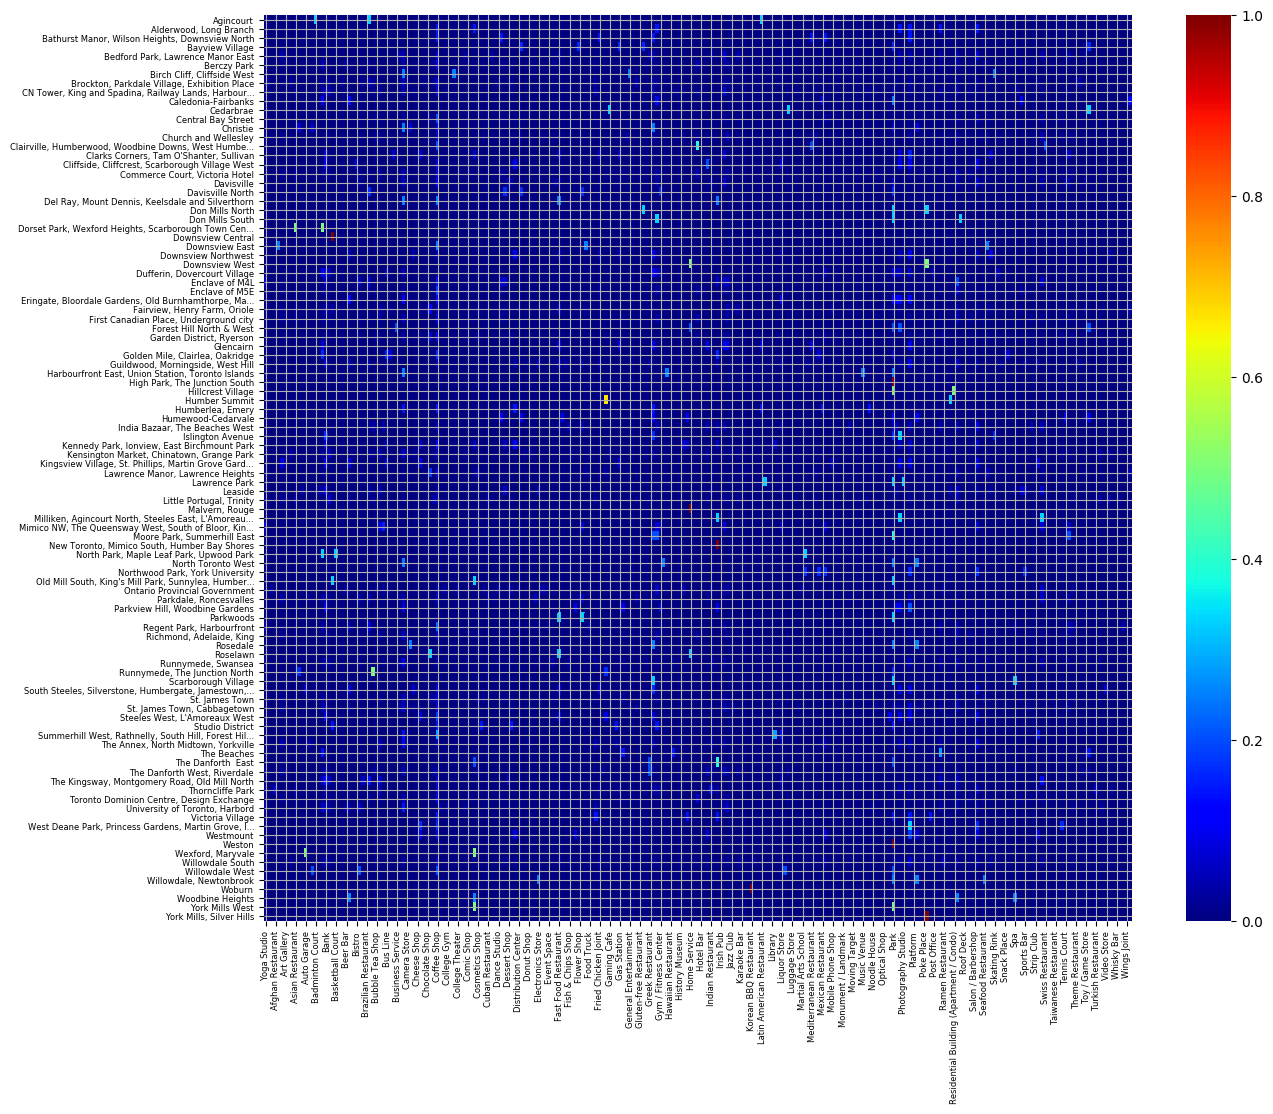

In [201]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
import seaborn as sns
fig=plt.figure(figsize=(14,12), dpi= 100, facecolor='w', edgecolor='k')
labels = [x if len(x) < 50 else x[:50]+'...' for x in toronto_grouped["Neighborhood"]]
sns.heatmap(toronto_grouped.transpose()[1:].transpose().astype('float'), cmap = "jet", yticklabels = labels)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
plt.grid(True)
plt.show()

This allows us to get some fast informations about some neighborhood and, of course, to validate our approach. For example, we can see that there is a big appearance of "Park" in Weston, which, according to sattelite view of Google Maps, seems logical.

Now we can push our analysis further by only keeping the most common venues of each neighborhood, using the following function.


In [115]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe with only the top 10 venues for each neighborhood.


In [150]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

<a id='item4'></a>


## 4. Cluster Neighborhoods


According the these top 10 venues, we can now run _k_-means to cluster the neighborhood into 10 clusters, based on the similarities between these top 10.


In [151]:
kclusters = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(toronto_grouped_clustering)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = neighborhoods
merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
merged.dropna(subset = ["Cluster Labels"], inplace=True)

Finally, let's visualize the resulting clusters

In [152]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>


## 5. Examine Clusters

As we can see, there are two main cluster on the Toronto City, the red and the purple one, englobing more than 80% of the city. We'll now try to analyse them to understand why they are so important.

#### Cluster 1

About the red cluster, as we can see there, it seems to contains a lots a places related to food and well-being, with common venues such as Pizza Place, Coffee Shop, Yoga Studio of Cosmetics shop. There is also a lot of store (clothing store, shoe store, ...), giving us the idea that if contains most of the commercial places. Anyway, as I have never been to Toronto, I can't be sure about these conclusion ...

In [202]:
merged.loc[merged['Cluster Labels'] == 0, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,0.0,Pizza Place,Intersection,Park,Portuguese Restaurant,Coffee Shop,French Restaurant,Hockey Arena,Gym Pool,Distribution Center,Fast Food Restaurant
2,"Regent Park, Harbourfront",0.0,Coffee Shop,Breakfast Spot,Yoga Studio,Theater,Distribution Center,Pub,Electronics Store,Restaurant,Event Space,Spa
3,"Lawrence Manor, Lawrence Heights",0.0,Clothing Store,Coffee Shop,Cosmetics Shop,Shoe Store,Women's Store,Restaurant,Food Court,Toy / Game Store,Sandwich Place,Men's Store
4,Ontario Provincial Government,0.0,Gym,Sushi Restaurant,Hobby Shop,Ramen Restaurant,Burrito Place,Martial Arts School,Mexican Restaurant,Ethiopian Restaurant,Escape Room,Coffee Shop
8,"Parkview Hill, Woodbine Gardens",0.0,Pizza Place,Intersection,Flea Market,Café,Gastropub,Gym / Fitness Center,Bank,Pet Store,Pharmacy,Fast Food Restaurant
9,"Garden District, Ryerson",0.0,Coffee Shop,Clothing Store,Café,Japanese Restaurant,Cosmetics Shop,Hotel,Ramen Restaurant,Fast Food Restaurant,Pizza Place,Italian Restaurant
10,Glencairn,0.0,Pizza Place,Grocery Store,Fast Food Restaurant,Gas Station,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Bakery,Mediterranean Restaurant,Ice Cream Shop
11,"West Deane Park, Princess Gardens, Martin Grov...",0.0,Pizza Place,Tea Room,Coffee Shop,Sandwich Place,Chinese Restaurant,Event Space,Electronics Store,Escape Room,Ethiopian Restaurant,Falafel Restaurant
14,Woodbine Heights,0.0,Convenience Store,Beer Store,Restaurant,Spa,Fish & Chips Shop,Filipino Restaurant,Field,Fish Market,Eastern European Restaurant,Farmers Market
15,St. James Town,0.0,Coffee Shop,Café,Seafood Restaurant,Clothing Store,Bakery,Cosmetics Shop,Cocktail Bar,Italian Restaurant,Restaurant,Gastropub


#### Cluster 2

The second cluster (purple) seems to be more linked to sport and Nature, with common venues such as Park, Golf, Sport Arena of Playground. It seems like there is less more shops than in the red cluster, with the exception of grocery store.

In [203]:
merged.loc[merged['Cluster Labels'] == 1, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,1.0,Food & Drink Shop,Park,Fast Food Restaurant,Eastern European Restaurant,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant,Field
5,Islington Avenue,1.0,Pharmacy,Grocery Store,Park,Skating Rink,Bank,Women's Store,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space
7,Don Mills North,1.0,Golf Driving Range,Pool,Park,Women's Store,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space
13,Don Mills South,1.0,River,Park,Gym,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Farmers Market
16,Humewood-Cedarvale,1.0,Grocery Store,Hockey Arena,Tennis Court,Playground,Park,Dog Run,Field,Deli / Bodega,Trail,Event Space
21,Caledonia-Fairbanks,1.0,Park,Women's Store,Gym,Beer Store,Mexican Restaurant,Sporting Goods Shop,Bakery,Fish Market,Fish & Chips Shop,Filipino Restaurant
25,Christie,1.0,Grocery Store,Café,Park,Coffee Shop,Playground,Baby Store,Candy Store,Athletics & Sports,Women's Store,Ethiopian Restaurant
31,"Dufferin, Dovercourt Village",1.0,Park,Grocery Store,Bakery,Bus Line,Café,Middle Eastern Restaurant,Bar,Smoke Shop,Post Office,Bank
32,Scarborough Village,1.0,Spa,Park,Grocery Store,Farmers Market,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant
36,"Harbourfront East, Union Station, Toronto Islands",1.0,Music Venue,Park,Harbor / Marina,Café,Women's Store,Falafel Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space


Unfortunately, others clusters are really small, make it difficult to get conclusion about it.